In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor 
from sklearn.tree import DecisionTreeClassifier
from  sklearn.cluster import KMeans

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing DataSet("loan.csv")
df=pd.read_csv('loan.csv')

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(614, 13)

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
#Checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#Droping all null values
df=df.dropna()

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 480, dtype: bool

In [12]:
df.duplicated().sum()

0

In [13]:
# Information about Each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [15]:
#Replacing numeric value with string
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [16]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [17]:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [18]:
df = df.replace(to_replace='3+',value=4)

In [19]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# DATA VISUALIZATION

([<matplotlib.patches.Wedge at 0x27f7c06af50>,
 [Text(0.3467584537489793, 1.0439150227646008, ''),
  Text(-1.0369056218661528, -0.36718759693427433, ''),
  Text(0.675334944304048, -0.8682872295512867, '')])

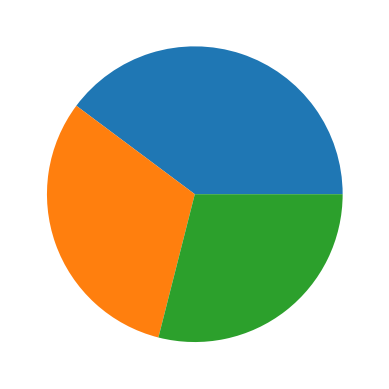

In [20]:
plt.pie(df["Property_Area"].value_counts())

([<matplotlib.patches.Wedge at 0x27f7c8b2b90>,
 [Text(1.0960207185862225, 0.09348039596482638, ''),
  Text(1.0643590009461867, 0.27774073720798587, ''),
  Text(1.0019502056422742, 0.45397773669355707, ''),
  Text(0.9146165699566833, 0.611127261673599, ''),
  Text(0.8222591527077583, 0.7306776894009558, ''),
  Text(0.7306776701545912, 0.8222591698105036, ''),
  Text(0.6348596918694275, 0.898305722813484, ''),
  Text(0.543753308038709, 0.9562072683246876, ''),
  Text(0.4539777103096777, 1.0019502175966541, ''),
  Text(0.36039317379975955, 1.039286659338287, ''),
  Text(0.2637848863327375, 1.0679033353924994, ''),
  Text(0.1649634054411323, 1.0875601477000088, ''),
  Text(0.07194341539041657, 1.0976448173165863, ''),
  Text(-0.014398583233603355, 1.0999057599634912, ''),
  Text(-0.10065180980132932, 1.0953854176424467, ''),
  Text(-0.18628448447302257, 1.0841116597678582, ''),
  Text(-0.270768653317852, 1.0661539928079982, ''),
  Text(-0.353583443325537, 1.0416231317545022, ''),
  Text(-0

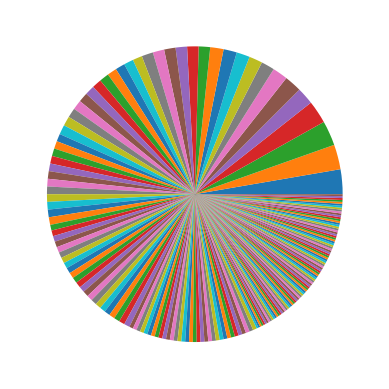

In [21]:
plt.pie(df["LoanAmount"].value_counts())

<Axes: xlabel='LoanAmount', ylabel='Property_Area'>

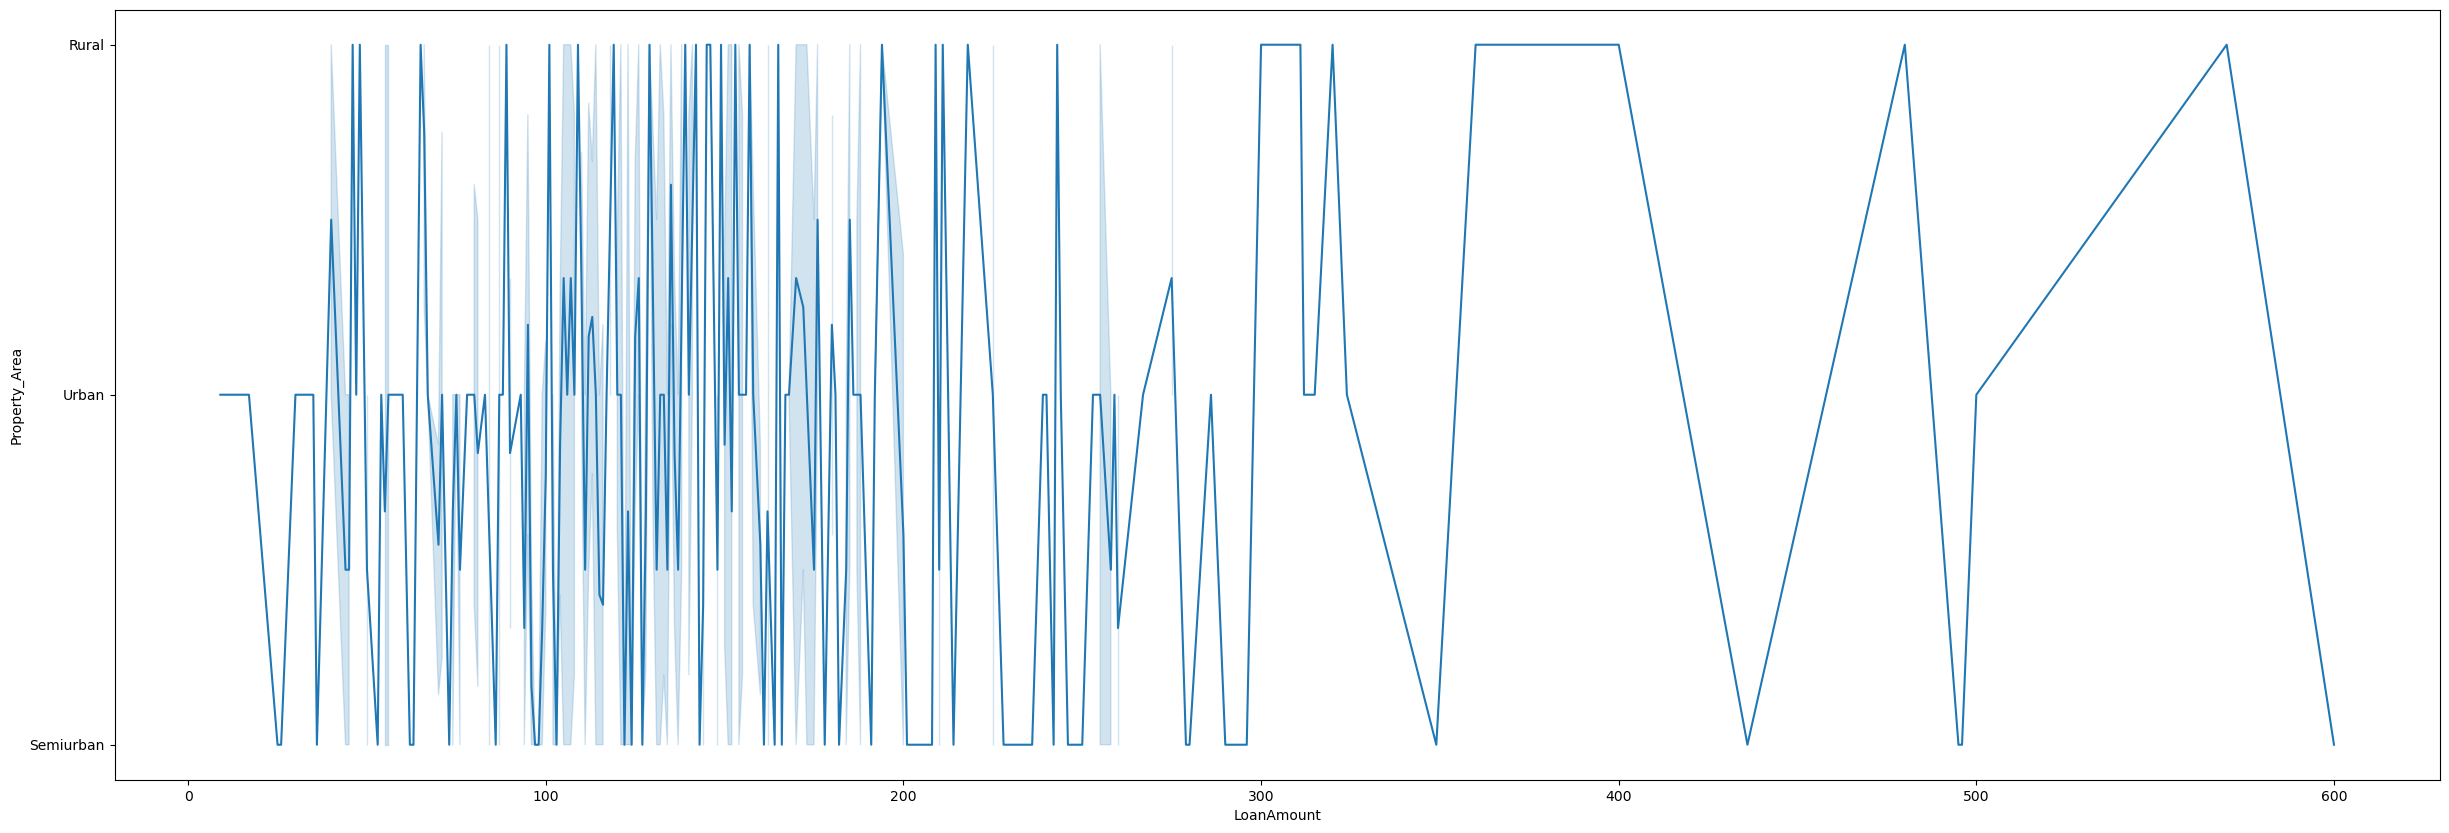

In [22]:
plt.subplots(figsize=(30,10))
sns.lineplot(df,x="LoanAmount",y="Property_Area",palette="muted")

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

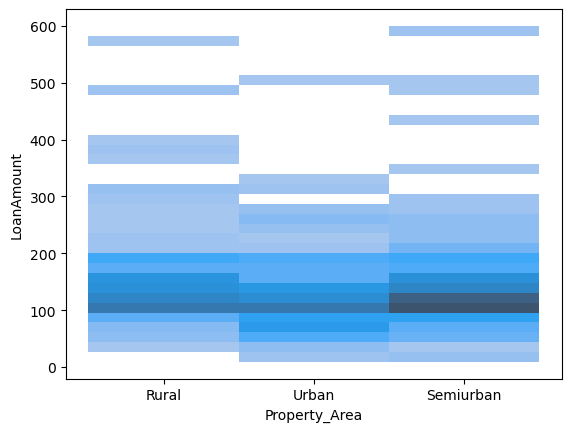

In [23]:
sns.histplot(df,x="Property_Area",y="LoanAmount",palette="muted")

In [24]:
corr_loan=df.corr()

In [25]:
corr_loan

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.043152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.049020
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.071753
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.007798
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.529390
Loan_Status,-0.043152,-0.049020,-0.071753,-0.007798,0.529390,1.000000


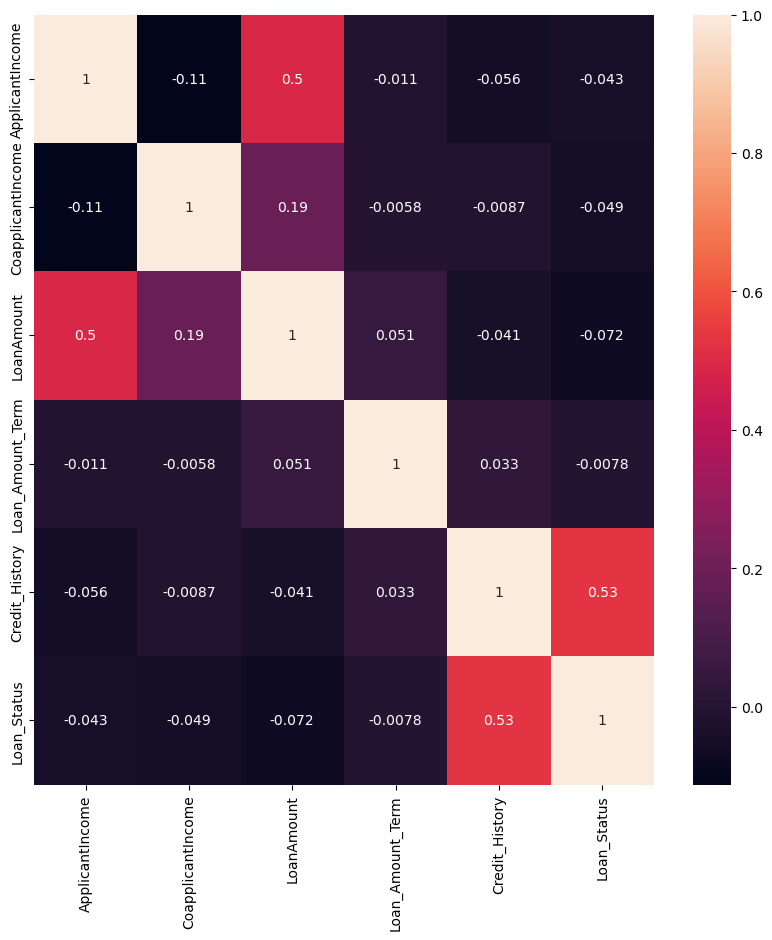

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

Credit_History are positively correlated with Loan_Status which means that better credit history we have it will increase the chance to get the loan approved.

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

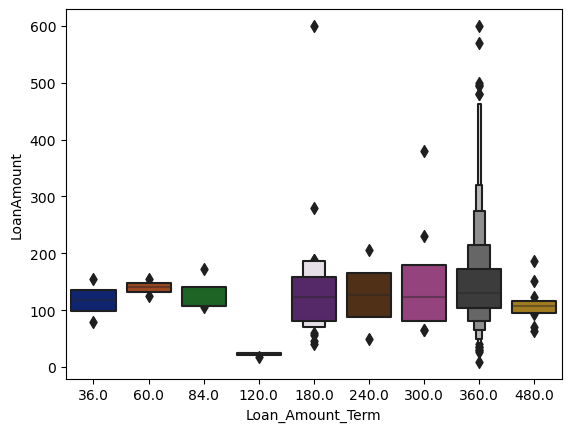

In [27]:
sns.boxenplot(data=df,x="Loan_Amount_Term",y="LoanAmount",palette="dark")

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

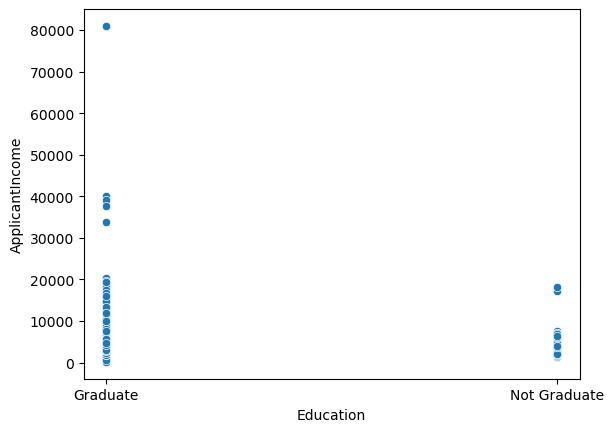

In [28]:
sns.scatterplot(data=df,x="Education",y="ApplicantIncome",palette="dark")

<Axes: xlabel='Education', ylabel='count'>

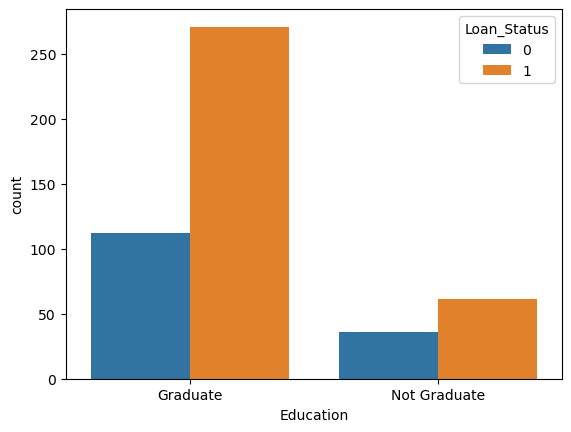

In [29]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

In [30]:
#Replacing numeric value with string
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [31]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [32]:
#model building
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

In [33]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [34]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

# Train Test Split

In [35]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.20,stratify=Y,random_state=2)
    

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


# ML Algorithms

# Logistic Regression

In [37]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [38]:
x_train_prediction = lr.predict(X_train)
tr_data_accuracy= accuracy_score(x_train_prediction,Y_train)

In [39]:
tr_data_accuracy

0.7994791666666666

In [40]:
x_test_prediction = lr.predict(X_test)
te_data_accuracy= accuracy_score(x_test_prediction,Y_test)

In [41]:
te_data_accuracy

0.8333333333333334

# Naive Byes

In [42]:
sc=StandardScaler()
x_train1=sc.fit_transform(X_train)
x_test1=sc.fit_transform(X_test)

In [43]:
model1 = GaussianNB()

In [44]:
model1.fit(x_train1,Y_train)

GaussianNB()

In [45]:
prd1=model1.predict(x_test1)
prd1

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [46]:
acc1=accuracy_score(Y_test,prd1)

In [47]:
acc1

0.8229166666666666

# SVC

In [48]:
model = svm.SVC(kernel='linear')


In [49]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [50]:
X_train_prediction = model.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction,Y_train)

In [51]:
training_data_accuracy

0.7786458333333334

In [52]:
X_test_prediction = model.predict(X_test)
test_data_acc= accuracy_score(X_test_prediction,Y_test)

In [53]:
test_data_acc

0.8125

# Random Forest

In [54]:
models2 = dict()

In [55]:
r= RandomForestClassifier(n_estimators=200)

In [56]:
r.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [57]:
X_test_prediction = r.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,Y_test)

In [58]:
test_data_accuracy

0.7916666666666666

# Decision Tree

In [59]:
models3 = dict()

In [60]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [61]:
X_test_prediction = tree.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,Y_test)

In [62]:
test_data_accuracy

0.6979166666666666

# K-Nearest Neighbour

In [63]:
wcss=[]

In [64]:
for k in range(1,11):
    k_mean=KMeans(n_clusters= k, init='k-means++', max_iter=300, n_init=10,random_state=46)
    k_mean.fit(X)
    wcss.append(k_mean.inertia_)


In [65]:
wcss

[18677226510.668785,
 10190744950.575905,
 6445855968.879351,
 4851392890.057975,
 3348589538.163715,
 2454660966.890525,
 1756280233.9661584,
 1334759118.8953297,
 1104632302.1895738,
 974264694.2490687]

In [66]:
k=4
k_mean=KMeans(n_clusters=k)
k_mean.fit(X)

KMeans(n_clusters=4)

In [67]:
X_test_prediction = k_mean.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,Y_test)

In [68]:
test_data_accuracy

0.2708333333333333

# Comparing the best algorithm

In [80]:
algorithms = ["Logistic Regression","Naive Byes","SVC","Random Forest","Decision Tree","K-Means"]
scores = [0.8333,0.8229,0.8125,0.8125,0.6979,0.2708] 

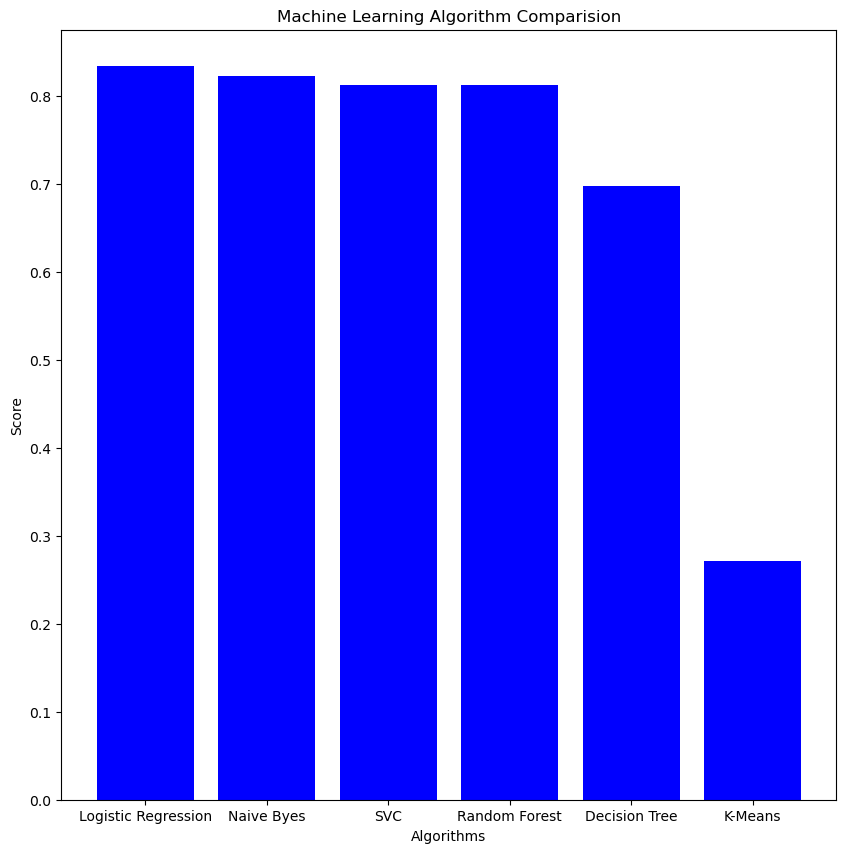

In [81]:
plt.figure(figsize=(10, 10))  

plt.bar(algorithms, scores, color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Machine Learning Algorithm Comparision')
plt.show()

# Predictive model with LR

In [71]:
import joblib

In [72]:
joblib.dump(lr,'Loan_Prediction_System')

['loan_status_predict']

In [73]:
model = joblib.load('Loan_Prediction_System')

In [74]:
import pandas as pd
df = pd.DataFrame({
    'Gender':1,
    'Married':0,
    'Dependents':0,
    'Education':1,
    'Self_Employed':0,
    'ApplicantIncome':5849,
    'CoapplicantIncome':0.0,
    'LoanAmount':0,
    'Loan_Amount_Term':360,
    'Credit_History':1,
    'Property_Area':2
},index=[0])

In [75]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,0,360,1,2


In [76]:
result = model.predict(df)

In [77]:
if result==1:
    print("Congratulation! Your Loan Is Approved")
else:
    print("Sorry.. Loan Not Approved")

Congratulation! Your Loan Is Approved
